In [1]:
import numpy as np
import matplotlib.pyplot as plt

5.361902647381804


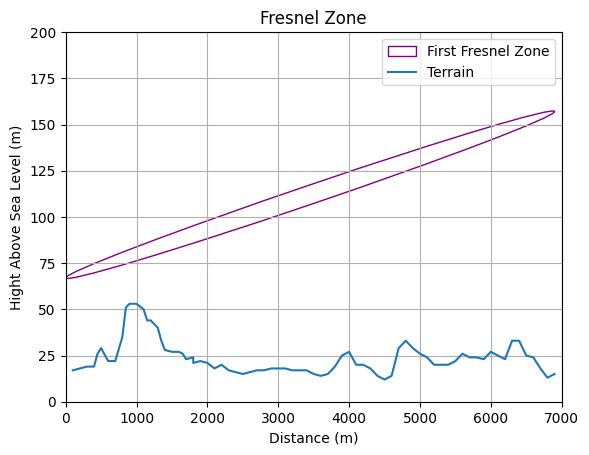

In [2]:
from matplotlib.patches import Ellipse

data = np.array([[100, 17], [200, 18], [300, 19], [400, 19], [450, 26], [500, 29], [600, 22], [700, 22], [800, 35],[850,51],[900,53],[1000,53],[1100,50],[1150,44],[1200,44],[1300,40],[1350,33],[1400,28],[1500,27],[1600,27],[1650,26],[1700,23],[1800,24],[1800,21],[1900,22],[2000,21],[2100,18],[2200,20],[2300,17],[2400,16],[2500,15],[2600,16],[2700,17],[2800,17],[2900,18],[3000,18],[3100,18],[3200,17],[3400,17],[3500,15],[3600,14],[3700,15],[3800,19],[3900,25],[4000,27],[4100,20],[4200,20],[4300,18],[4400,14],[4500,12],[4600,14],[4700,29],[4800,33],[4900,29],[5000,26],[5100,24],[5200,20],[5300,20],[5400,20],[5500,22],[5600,26],[5700,24],[5800,24],[5900,23],[6000,27],[6100,25],[6200,23],[6300,33],[6400,33],[6500,25],[6600,24],[6700,18],[6800,13],[6900,15]])
x, y = data.T 
d = 6900 / 2 
n = 1
f = 18e9 
c = 3e8 
lambda_ = c / f 


R = np.sqrt((n * d * d * lambda_) / (d + d))
print(R)

x1, y1 = 0, 67
x2, y2 = 6900, 157

center_x = (x1 + x2) / 2
center_y = (y1 + y2) / 2

ang = np.arctan2(y2 - y1, x2 - x1)

width = x2 - x1
height = y2 - y1


fig, ax = plt.subplots()


ellipse = Ellipse((center_x, center_y), width=width, height=R * 2, angle=np.degrees(ang),
                  edgecolor='purple', facecolor='none', transform=ax.transData, label='First Fresnel Zone')
ax.add_patch(ellipse)


ax.set_title('Fresnel Zone')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Hight Above Sea Level (m)')


ax.set_xlim(0, 7000)
ax.set_ylim(0, 200)
ax.plot(x,y, label='Terrain')
ax.legend()
ax.grid()
plt.savefig('fresnel.png')
plt.show()



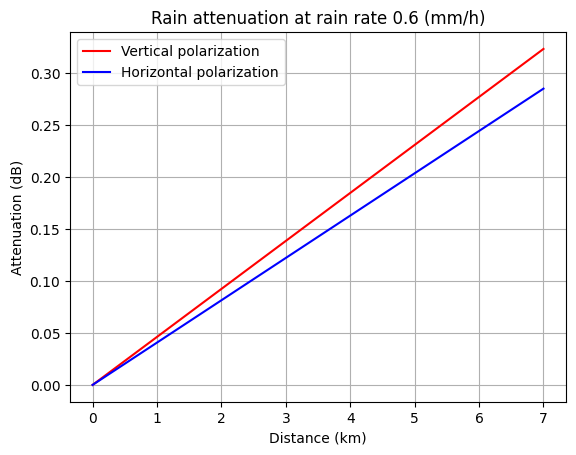

0.31870393466283614
0.2810371105787922


In [3]:
def rain_attenuation_v (distance, R = 0.6):
    alpha = 1.0025
    k = 0.07708
    Y_R = k*R**alpha
    return Y_R * distance
def rain_attenuation_h (distance, R = 0.6):
    alpha = 1.0818
    k = 0.07078
    Y_R = k*R**alpha
    return Y_R * distance

fig, ax = plt.subplots()
x = np.linspace(0, 7, 100)
plt.plot(x, rain_attenuation_v(x), color='red',label='Vertical polarization')
plt.plot(x, rain_attenuation_h(x), color='blue',label='Horizontal polarization')
plt.legend()
ax.set_title('Rain attenuation at rain rate 0.6 (mm/h)')
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Attenuation (dB)')
plt.grid()
plt.savefig('rain_attenuation.png')
plt.show()

print(rain_attenuation_v(6.9))
print(rain_attenuation_h(6.9))

In [6]:
f = 18e9
B = 50e6
k = 1.38e-23
T = 290
r = 6900
c = 3e8
n = 0.57
h1 = 67
h2 = 157
Pt = 1
Pt_dB = 0
d1 = 0.3
d2 = 0.6
d3 = 0.9
lambda_ = (c/f)

N_dB = 10*np.log10(k*B*T)

Ae_30_dB = 10*np.log10((n*np.pi*d1**2)/4)
Ae_60_dB = 10*np.log10((n*np.pi*d2**2)/4)
Ae_90_dB = 10*np.log10((n*np.pi*d3**2)/4)

G_30_dB = 10*np.log10((4*np.pi)/lambda_) + Ae_30_dB
G_60_dB = 10*np.log10((4*np.pi)/lambda_) + Ae_60_dB
G_90_dB = 10*np.log10((4*np.pi)/lambda_) + Ae_90_dB

power_density_dB = Pt_dB - 10*np.log10(4*np.pi*r**2)
Pr_30_dB = power_density_dB + Ae_30_dB
Pr_60_dB = power_density_dB + Ae_60_dB
Pr_90_dB = power_density_dB + Ae_90_dB

Lfs_dB = 10*np.log10(((4*np.pi*r)/lambda_)**2)

SNR_30_dB = Pt_dB + G_30_dB - Lfs_dB + G_30_dB - N_dB
SNR_60_dB = Pt_dB + G_60_dB - Lfs_dB + G_60_dB - N_dB
SNR_90_dB = Pt_dB + G_90_dB - Lfs_dB + G_90_dB - N_dB

print('recived power=',Pr_30_dB, Pr_60_dB, Pr_90_dB)
print('recived power dBm=',Pr_30_dB+30, Pr_60_dB+30, Pr_90_dB+30)
SNR_30 = 10**(SNR_30_dB/10)
SNR_60 = 10**(SNR_60_dB/10)
SNR_90 = 10**(SNR_90_dB/10)

C_30 = B*np.log2(1+SNR_30)
C_60 = B*np.log2(1+SNR_60)
C_90 = B*np.log2(1+SNR_90)
print('SNR=',SNR_30_dB,SNR_60_dB,SNR_90_dB)
print('capacity=',C_30/10**6,C_60/10**6,C_90/10**6)

recived power= -101.71700799018618 -95.69640807690656 -92.17458289579294
recived power dBm= -71.71700799018618 -65.69640807690656 -62.17458289579294
SNR= 22.314692228452543 34.35589205501179 41.39954241723902
capacity= 371.06110426285045 570.6654682593178 687.636741418678
